In [1]:
import logging
import numpy as np
import pandas as pd
import os
import sys
import PIL
import random
sys.path.append(os.path.join('../src'))
from utils.definitions import ROOT_DIR
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
from time import time
%load_ext autoreload
%autoreload 2

FileNotFoundError: [Errno 2] No such file or directory: '/home/ariel/PycharmProjects/laser-mde/data/farsight/test.txt'

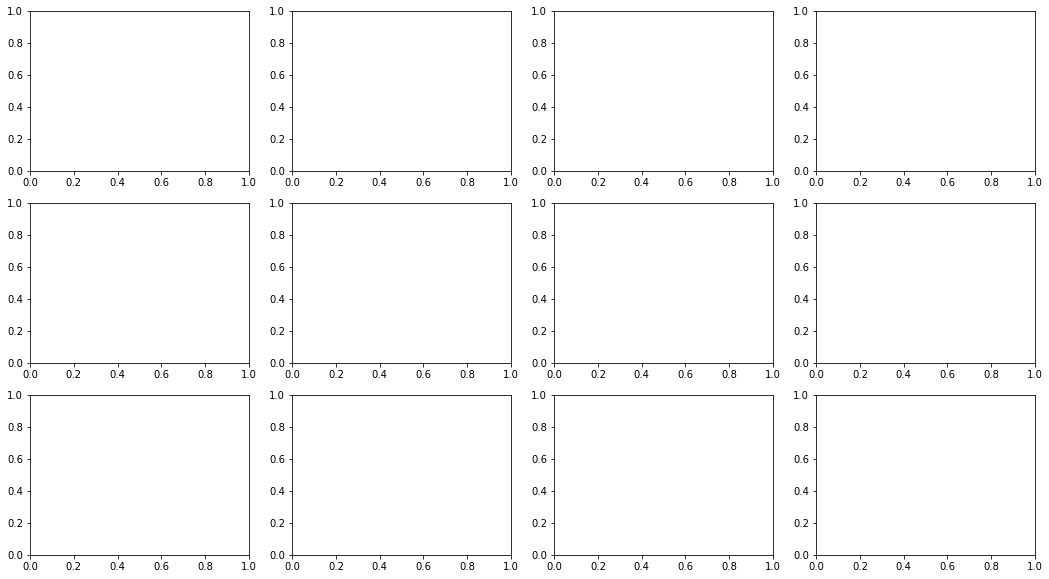

In [2]:

# logging.basicConfig(level=logging.INFO)
data_dir = str(ROOT_DIR) + '/data/farsight/'

def read_image(path):
    """ 
    returns farsight image from path
    """
#     logger = logging.getLogger(__name__)
#     logger.warning('getting train and test data')
    # load image as pixel array
    data = image.imread(os.path.join(data_dir, 'img/', path))
    # summarize shape of the pixel array
#     print(type(data))
#     print(data.dtype)
#     print(data.shape)
    # display the array of pixels as an image
    return data

def read_image_depth(path):
    """ 
    returns farsight image depth of range [0,1] from path
    """
    return image.imread(os.path.join(data_dir, 'depth/', path))

def read_images(path):
    img =  image.imread(os.path.join(data_dir, 'img/', path))
    depth = image.imread(os.path.join(data_dir, 'depth/', path))
    depth_in_meters = image.imread(os.path.join(data_dir, 'depth-in-meters/', path))
    return img,depth,depth_in_meters

def get_image_list(isTrain=True):
    if isTrain:
        return data_dir + 'train.txt'
    else:
        return data_dir + 'test.txt'


def print_some_images():
    imgs = list()
#     imgs_depth = list()
    fig, ax = pyplot.subplots(3,4,figsize=(18, 10))
    with open(get_image_list(False)) as f:
        for i,img_path in enumerate(f.readlines()):
            if i>3:
                break
            img_set = read_images(img_path.strip('\n'))
            imgs.append(img_set)
            print('> loaded %s %s' % (img_path, img_set[0].shape))
            for j,img in enumerate(img_set):
                ax[j,i].imshow(img)
#             img_depth = read_image_depth(img_path.strip('\n'))
#             imgs_depth.append(img_depth)
            ax[0,i].imshow(img)
            ax[0,i].title.set_text(img_path.split('_')[0])
#             im = ax[1,i].imshow(img_depth)
#             ax[1,i].colorbar()
#     for i,(img, img_depth) in enumerate(zip(imgs,imgs_depth)):
#     fig.subplots_adjust(right=0.9)
#     cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.3])
#     fig.colorbar(im, cax=cbar_ax)    
    pyplot.show()
    pyplot.hist(imgs[0][2].ravel(), bins=256, range=(0.0, 0.02))
    pyplot.title('hist of depth values')
#     min=1
#     max=0
#     idx = 0
#     for i, di in enumerate(imgs_depth):
#         dmax = di.max()
# #         dmin = di.min()
#         if(dmax>max):
#             max = dmax
#             idx = i
# #         if(dmin<min):
# #             min=dmin
#     print('max: ',max)
#     pyplot.imshow(imgs_depth[idx])
if __name__ == '__main__':
    print_some_images()

In [5]:
class DataLoader():
    def __init__(self, path=data_dir,mode='train'):
        self.path = path
        self.set_mode(mode)
    
    def read_image(self, path, depth=False):
        if depth == True:
            img_type = 'depth/'
        else:
            img_type = 'img/'
        return image.imread(os.path.join(data_dir, img_type, path))
    
    def get_batch(self, batch_size=30):
        fn = os.path.join(data_dir, self.mode + '.txt')
        imgs = []
        img_depths = []
        locs =[]
        with open(fn,'r') as f:
            for i,img_path in enumerate(f.readlines()):
                img_path = img_path.strip('\n')
                if i >= batch_size:
                    break
                imgs.append(self.read_image(img_path))
                img_depths.append(self.read_image(img_path, depth=True))
                locs.append(img_path.split('_')[0])
                yield imgs[-1], img_depths[-1], locs[-1]
        return imgs, img_depths, locs
    
    def set_mode(self,mode):
        mode = mode.lower()
        if mode == 'train' or mode == 'test':
            self.mode = mode
        else:
            print('mode %s doesn\'t exist. enter train or test.' % mode)
            
        

0.6965210437774658


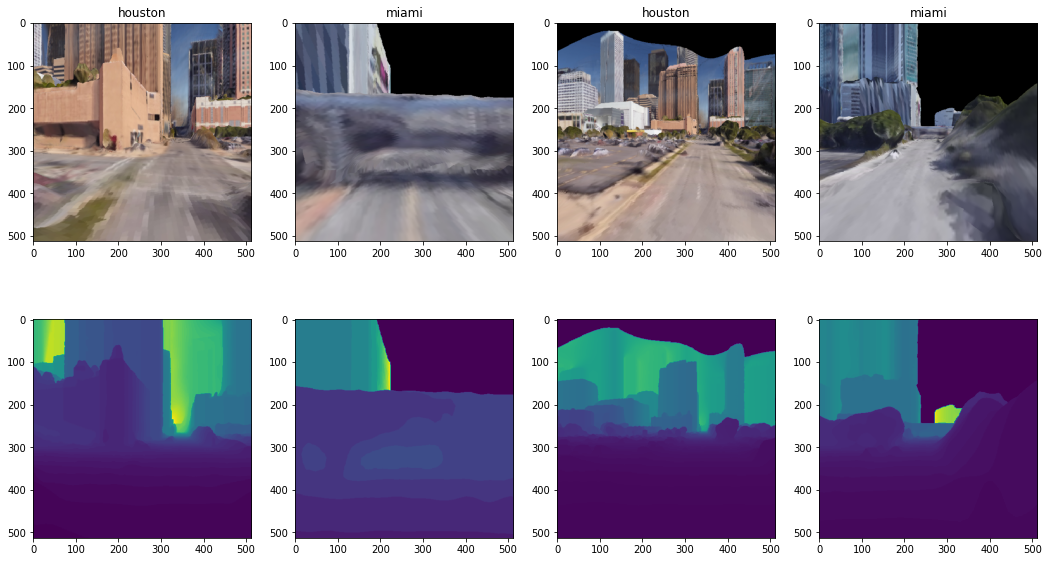

In [6]:
dl = DataLoader(mode='test')
# print(len(dl.get_batch(batch_size=2)))
# imgs, img_depths = 
now = time()
fig, ax = pyplot.subplots(2,4,figsize=(18, 10))
# for i, (img, img_depth, loc) in enumerate(zip(*dl.get_batch())):
for i, (img, img_depth, loc) in enumerate(dl.get_batch()):
    if i>3:
        break
    ax[0,i].imshow(img)
    ax[0,i].title.set_text(loc)
    ax[1,i].imshow(img_depth)
print(time()-now)

In [15]:
class Visualilzer():
    def __init__(self, dataloader):
        self.dl = dl
        
    def show_train(self):
        self.dl.set_mode('train')
        fig, ax = pyplot.subplots(2,4,figsize=(18, 10))
        for i, (img, img_depth, loc) in enumerate(dl.get_batch()):
            if i>3:
                break
            ax[0,i].imshow(img)
            ax[0,i].title.set_text(loc)
            ax[1,i].imshow(img_depth,cmap='Spectral')

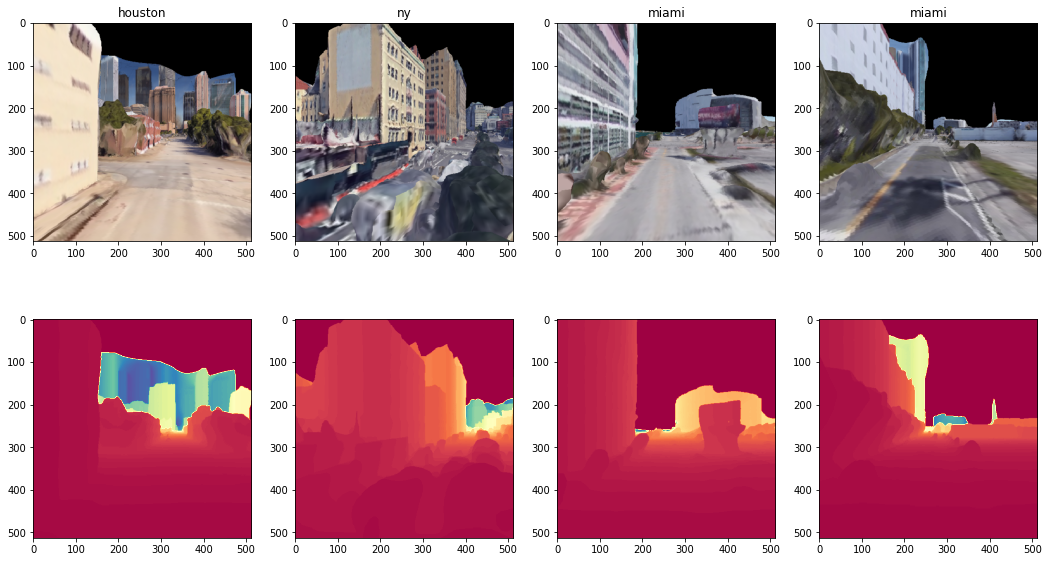

In [16]:
vis = Visualilzer(DataLoader())
vis.show_train()